<a href="https://colab.research.google.com/github/LuchithaP/ML/blob/main/California_House_Pricingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels
!pip install scipy



In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
file_path = "/content/housing.csv"

In [4]:
data = pd.read_csv(file_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# Missing Data Analysis

In [9]:
missing_data = data.isnull().sum()
missing_data

missing_percentage = (missing_data / len(data)) * 100
missing_percentage

print("Missing Values in each column:\n", missing_data)
print("Missing percentage:\n", missing_percentage)

Missing Values in each column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Missing percentage:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [10]:
# Remove missing data rows
data_cleaned = data.dropna()


print("Cleaned Data:\n",data_cleaned.isnull().sum())

Cleaned Data:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Data Exploration and Visualization

In [11]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


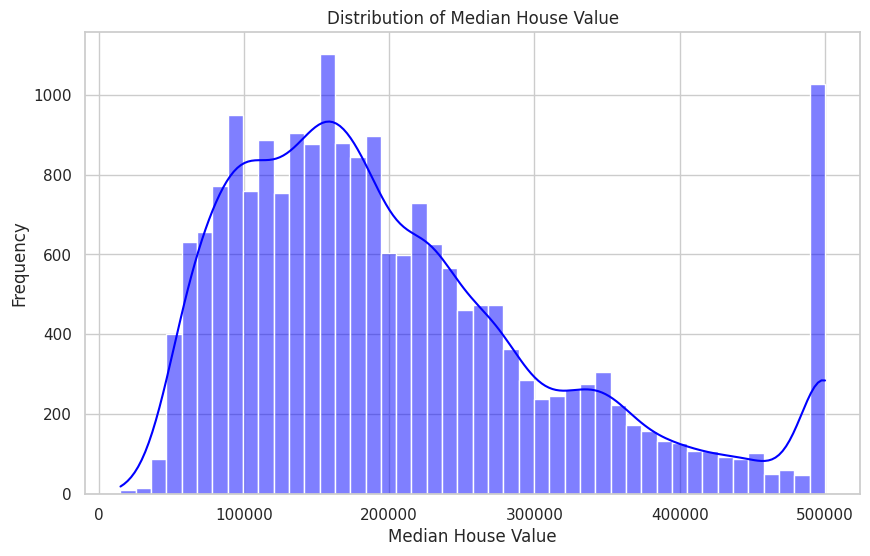

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['median_house_value'], color= "blue", kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

Outlier Removal(IQR)

In [13]:
Q1 = data_cleaned['median_house_value'].quantile(0.25)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

#define boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)]

#check shape
print("Original Data Shape:", data_cleaned.shape)
print("Data Shape after removing outliers:", data_no_outliers.shape)

Original Data Shape: (20433, 10)
Data Shape after removing outliers: (19369, 10)


# Box Plot for outlier detection

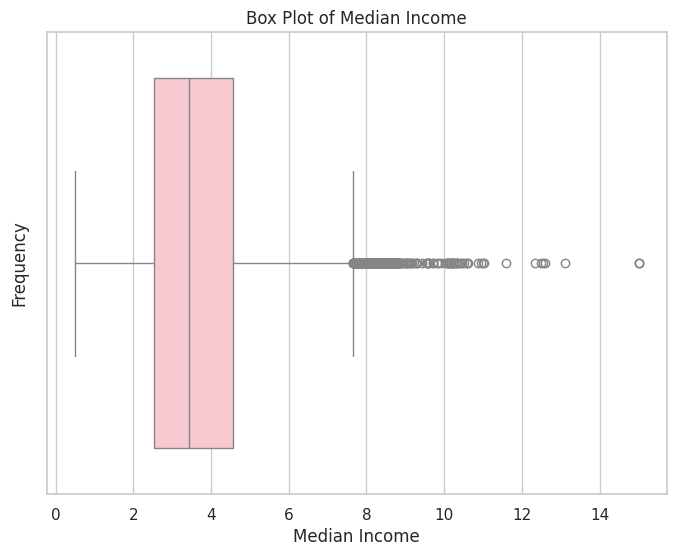

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_no_outliers['median_income'],color = "pink")
plt.title('Box Plot of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

In [15]:
Q1 = data_no_outliers['median_income'].quantile(0.25)
Q3 = data_no_outliers['median_income'].quantile(0.75)
IQR = Q3 - Q1

#define boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_no_outliers[(data_cleaned['median_income'] >= lower_bound) & (data_no_outliers['median_income'] <= upper_bound)]

#check shape
print("Original Data Shape:", data_cleaned.shape)
print("Data Shape after removing outliers:", data_no_outliers_2.shape)

Original Data Shape: (20433, 10)
Data Shape after removing outliers: (19026, 10)


<ipython-input-15-2767a93593e4>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_no_outliers_2 = data_no_outliers[(data_cleaned['median_income'] >= lower_bound) & (data_no_outliers['median_income'] <= upper_bound)]


In [16]:
data = data_no_outliers_2
data
#data_no_ocean_proximity = data.drop('ocean_proximity', axis=1)
#data_no_ocean_proximity


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Correlation HeatMap

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'NEAR BAY'

<Figure size 1500x1000 with 0 Axes>

In [18]:
data_dropped = data.drop('total_bedrooms', axis=1)
data_dropped.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [19]:
for column in ['ocean_proximity']:
    print(f'Unique values in {column}:')
    print(data_dropped[column].unique())
    print()

Unique values in ocean_proximity:
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']



# String data categorization to Dummy Variables

In [20]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')
data = pd.concat([data.drop('ocean_proximity',axis = 1), ocean_proximity_dummies], axis=1)

ocean_proximity_dummies


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
6,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [21]:
data.columns



Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [22]:
data = data.drop('ocean_proximity_ISLAND', axis=1)
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,False,False,True,False
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,False,False,True,False
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,False,False,True,False
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,False,False,True,False
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,False,False,True,False
10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,False,False,True,False
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,False,False,True,False


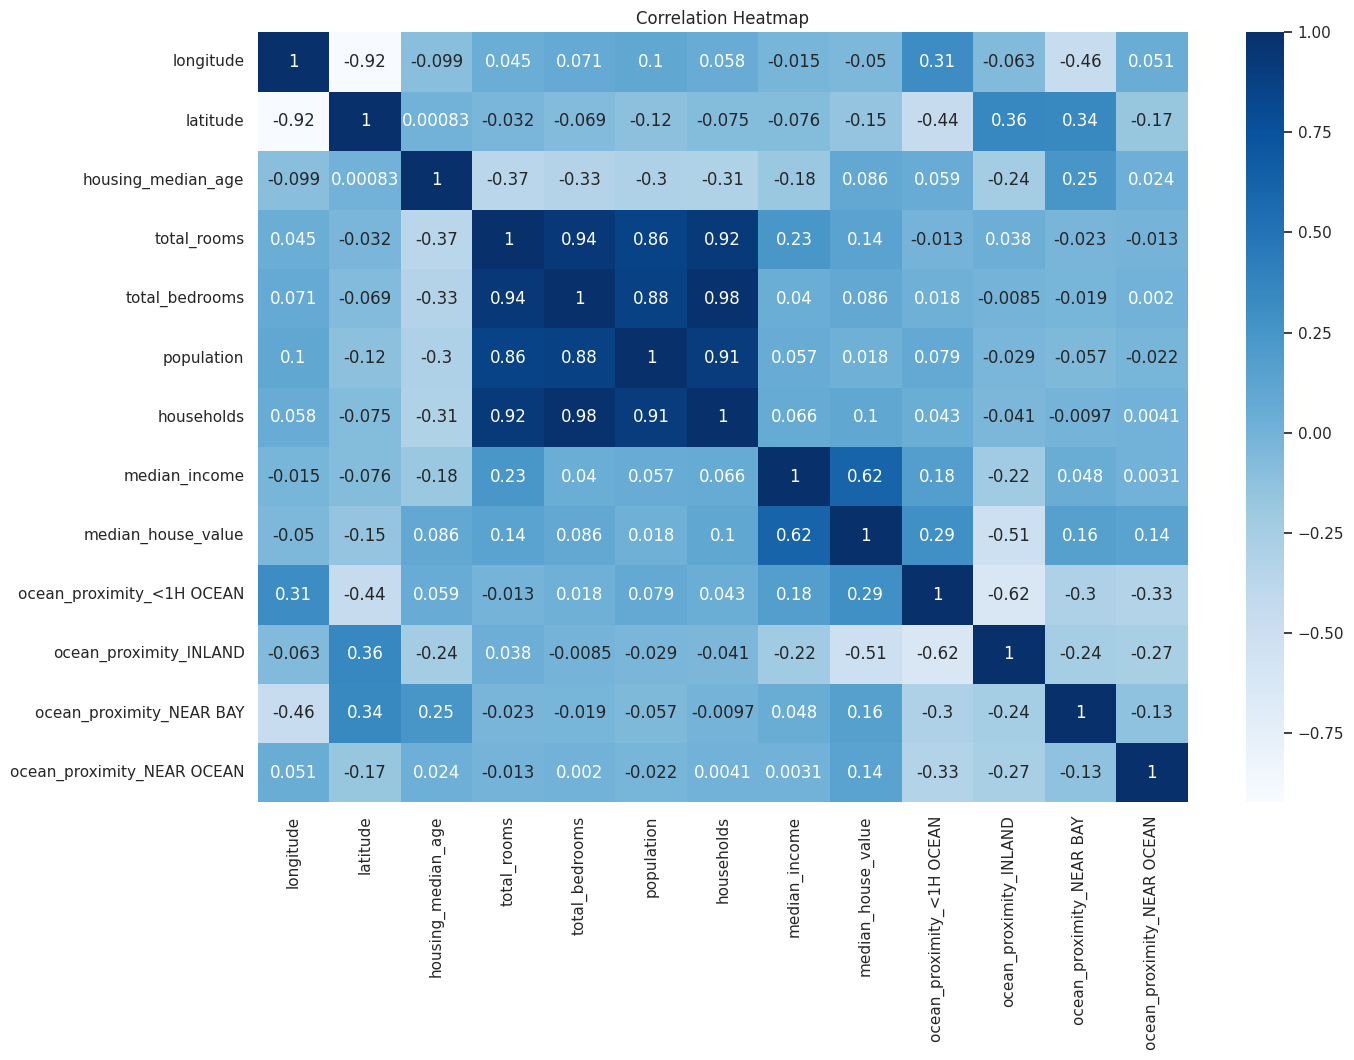

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

# Splitting Data into Train and Test

In [24]:
#convert boolean to numerical
for column in data.select_dtypes(include=['bool']).columns:
    data[column] = data[column].astype(int)

In [59]:
#Define your features(indpendent var) and target(dependent var)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ['median_house_value']

X = data[features]
y = data[target]

#split data into training and testing data
#random state ensuresreproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 150)

#check the size of splits
print(len(set(X_train.index) & set(X_test.index)))  # Should be 0 for no overlap
print(f'X_train shape: {X_train.shape[0]} samples')
print(f'X_test shape: {X_test.shape[0]} samples')
print(f'y_train shape: {y_train.shape[0]} samples')
print(f'y_test shape: {y_test.shape[0]} samples')

0
X_train shape: 15220 samples
X_test shape: 3806 samples
y_train shape: 15220 samples
y_test shape: 3806 samples


# Statsmodel.api


# Training

In [60]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,0,0,1,0
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,0,0,1,0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19026 entries, 2 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   19026 non-null  float64
 1   latitude                    19026 non-null  float64
 2   housing_median_age          19026 non-null  float64
 3   total_rooms                 19026 non-null  float64
 4   total_bedrooms              19026 non-null  float64
 5   population                  19026 non-null  float64
 6   households                  19026 non-null  float64
 7   median_income               19026 non-null  float64
 8   median_house_value          19026 non-null  float64
 9   ocean_proximity_<1H OCEAN   19026 non-null  int64  
 10  ocean_proximity_INLAND      19026 non-null  int64  
 11  ocean_proximity_NEAR BAY    19026 non-null  int64  
 12  ocean_proximity_NEAR OCEAN  19026 non-null  int64  
dtypes: float64(9), int64(4)
memory usage

In [62]:
#adding constant to the predictors because statmodls OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)

#Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

#print the summary of the model
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.777e+31
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:45:25   Log-Likelihood:             2.9820e+05
No. Observations:               15220   AIC:                        -5.964e+05
Df Residuals:                   15206   BIC:                        -5.963e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Prediction/Testing

In [63]:
#adding constant to the predictors

X_test_const = sm.add_constant(X_test)

#make predictions on the test set
y_pred = model_fitted.predict(X_test_const)
y_pred

,0
19911,109000.0
13861,302600.0
13821,170600.0
18227,266700.0
1000,184400.0
...,...
7218,143400.0
5508,303900.0
19190,169700.0
12460,62000.0


# Checking OLS Assumptions


A1: Linearity

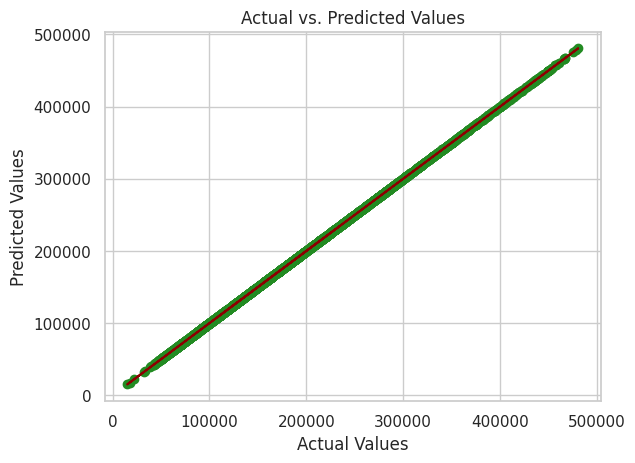

In [64]:
#scatteer plot for observed and predicted  values on test data
plt.scatter(y_test, y_pred, color = 'forestgreen')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot(y_test, y_test , color = "darkred")   #line for perfect predictions
plt.show()

A2:  Random Sample

In [65]:
#calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)
print(f'Mean of Residuals: {mean_residuals}')

Mean of Residuals: 7.338142671112005e-10


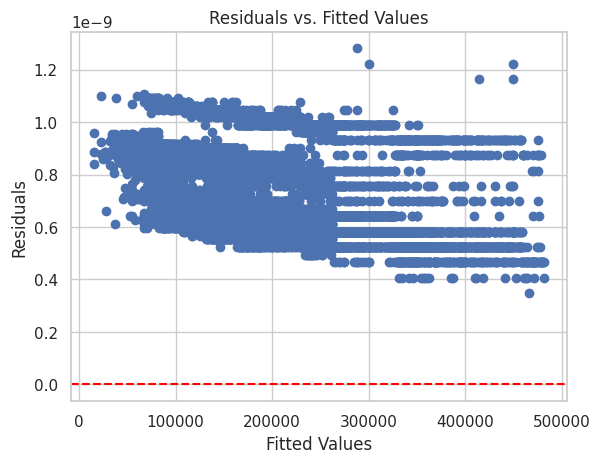

In [66]:
#plotting residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

A3: Exogeneity

In [67]:
residuals = model_fitted.resid

#check for the correlation between residuals and predictors
for column in X_train.columns:
    correlation = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between {column} and residuals: {correlation}')

Correlation between longitude and residuals: -0.4934033023514945
Correlation between latitude and residuals: 0.6460694172806418
Correlation between housing_median_age and residuals: -0.0033384804735027826
Correlation between total_rooms and residuals: -0.023127649358627777
Correlation between total_bedrooms and residuals: -0.03772180425762586
Correlation between population and residuals: -0.07707790898108584
Correlation between households and residuals: -0.06037919451256265
Correlation between median_income and residuals: -0.2976567740786776
Correlation between median_house_value and residuals: -0.4776427171352549
Correlation between ocean_proximity_<1H OCEAN and residuals: -0.6246943768867698
Correlation between ocean_proximity_INLAND and residuals: 0.5722508946037246
Correlation between ocean_proximity_NEAR BAY and residuals: 0.5834054105320319
Correlation between ocean_proximity_NEAR OCEAN and residuals: -0.42322319696071947


Homoskedasticy

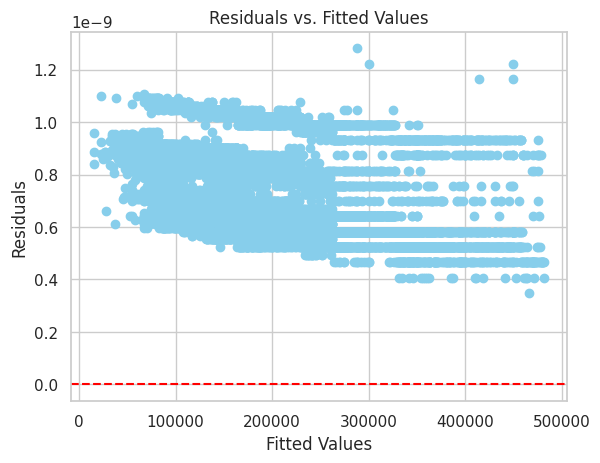

In [68]:
#Plotting residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid,color = 'skyblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


#Train and Test Model with Sklearn


Scaling the data

In [69]:
from sklearn.preprocessing import StandardScaler

#intialize the standardscalar
scaler = StandardScaler()

#fit the data into standardscalar and transform it
X_train_scaled = scaler.fit_transform(X_train)

#same technique for test data
X_test_scaled = scaler.transform(X_test)


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

#create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

#make predictions on the test set
y_pred = lr.predict(X_test_scaled)

#evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

#print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 4.414586166139189e-20
Root Mean Squared Error: 2.101091660575328e-10
R-squared: 1.0
